## EDA on taxi pred data

In [2]:
import os
os.chdir("..")  # hoppar upp till projektroten
print("New cwd:", os.getcwd())

New cwd: c:\Skolprojekt\ai_engineering\taxi-prediction-fullstack-jonas-gustafsson-opa24


In [3]:
import pandas as pd

df = pd.read_csv("src/taxipred/data/taxi_trip_pricing.csv")
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [5]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [7]:
df.head(20)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,NaN
9,35.70,Afternoon,Weekday,2.0,Low,Rain,3.39,1.52,0.47,NaN,75.5657


In [8]:
from src.taxipred.backend.data_processing import clean_taxi_data

df = pd.read_csv("src/taxipred/data/taxi_trip_pricing.csv")

# Rensa datan
cleaned_df, train_df, predict_df = clean_taxi_data(df)


# Spara till ny CSV
cleaned_df.to_csv("src/taxipred/data/taxi_trip_pricing_clean.csv", index=False)
train_df.to_csv("src/taxipred/data/taxi_trip_pricing_train.csv", index=False)
predict_df.to_csv("src/taxipred/data/taxi_trip_pricing_predict.csv", index=False)


cleaned_df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,Unknown,3.48,0.51,0.15,116.81,36.4698
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
8,30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,NaN


In [9]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       766 non-null    float64
 1   Time_of_Day            766 non-null    object 
 2   Day_of_Week            766 non-null    object 
 3   Passenger_Count        766 non-null    float64
 4   Traffic_Conditions     766 non-null    object 
 5   Weather                766 non-null    object 
 6   Base_Fare              766 non-null    float64
 7   Per_Km_Rate            766 non-null    float64
 8   Per_Minute_Rate        766 non-null    float64
 9   Trip_Duration_Minutes  766 non-null    float64
 10  Trip_Price             734 non-null    float64
dtypes: float64(7), object(4)
memory usage: 71.8+ KB


In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       766 non-null    float64
 1   Time_of_Day            766 non-null    object 
 2   Day_of_Week            766 non-null    object 
 3   Passenger_Count        766 non-null    float64
 4   Traffic_Conditions     766 non-null    object 
 5   Weather                766 non-null    object 
 6   Base_Fare              766 non-null    float64
 7   Per_Km_Rate            766 non-null    float64
 8   Per_Minute_Rate        766 non-null    float64
 9   Trip_Duration_Minutes  766 non-null    float64
 10  Trip_Price             734 non-null    float64
dtypes: float64(7), object(4)
memory usage: 71.8+ KB


In [11]:
cleaned_df.head(20)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.262400
2,36.870000,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.903200
3,30.330000,Evening,Weekday,4.0,Low,Unknown,3.48,0.51,0.15,116.81,36.469800
5,8.640000,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.202800
8,30.450000,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,NaN
12,41.790000,Night,Weekend,3.0,High,Clear,4.60,1.77,0.11,86.95,88.132800
14,9.910000,Evening,Weekday,2.0,High,Clear,2.32,1.26,0.34,41.72,28.991400
15,9.990000,Night,Weekday,4.0,High,Clear,4.33,0.85,0.43,34.00,27.441500
16,15.910000,Morning,Weekday,4.0,Low,Clear,4.42,1.77,0.21,114.93,56.716000
17,26.710000,Afternoon,Weekend,4.0,Low,Rain,4.30,1.59,0.20,111.18,69.004900


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       714 non-null    float64
 1   Time_of_Day            714 non-null    object 
 2   Day_of_Week            714 non-null    object 
 3   Passenger_Count        714 non-null    float64
 4   Traffic_Conditions     714 non-null    object 
 5   Weather                714 non-null    object 
 6   Base_Fare              714 non-null    float64
 7   Per_Km_Rate            714 non-null    float64
 8   Per_Minute_Rate        714 non-null    float64
 9   Trip_Duration_Minutes  714 non-null    float64
 10  Trip_Price             714 non-null    float64
dtypes: float64(7), object(4)
memory usage: 66.9+ KB


In [13]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 8 to 991
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       32 non-null     float64
 1   Time_of_Day            32 non-null     object 
 2   Day_of_Week            32 non-null     object 
 3   Passenger_Count        32 non-null     float64
 4   Traffic_Conditions     32 non-null     object 
 5   Weather                32 non-null     object 
 6   Base_Fare              32 non-null     float64
 7   Per_Km_Rate            32 non-null     float64
 8   Per_Minute_Rate        32 non-null     float64
 9   Trip_Duration_Minutes  32 non-null     float64
 10  Trip_Price             0 non-null      float64
dtypes: float64(7), object(4)
memory usage: 3.0+ KB


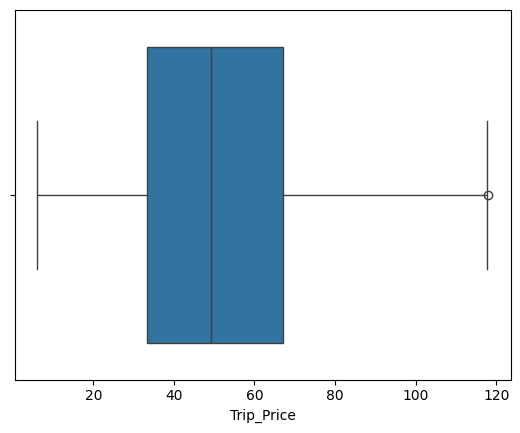

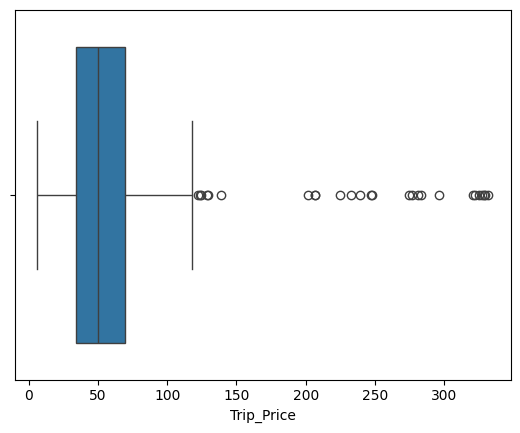

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df["Trip_Price"])
plt.show()
sns.boxplot(x=df["Trip_Price"])

plt.show()

In [15]:
dfs = {
    "Rådata": df,
    "Cleaned": cleaned_df,
    "Train": train_df
}

for name, data in dfs.items():
    min_val = data["Trip_Price"].min()
    max_val = data["Trip_Price"].max()
    print(f"{name}: min={min_val}, max={max_val}")

Rådata: min=6.1269, max=332.0436886774302
Cleaned: min=6.1269, max=332.0436886774302
Train: min=6.1269, max=118.0321
